<a href="https://colab.research.google.com/github/jonathanahc/PLN_Practicas/blob/main/Aplicaci%C3%B3n_de_t%C3%A9cnicas_de_PLN_Jonathan_Herrera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import re
from unidecode import unidecode
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [7]:
with open("/content/drive/MyDrive/PLN/textoParaPreprocesar.txt", "r", encoding='utf-8') as archivo:
  contenido = archivo.read()

In [9]:
print(contenido)

"""En el Congreso Internacional de Inteligencia Artificial 2025 se discutieron avances muy importantes.
@Maria comentó que la ética de la IA debe estar siempre en el centro de las investigaciones.
Puedes leer más en http://ia-congreso2025.org o enviar tus dudas al correo contacto@ia2025.org.
El Dr. Pérez afirmó: "¡La innovación no se detiene!". #InteligenciaArtificial #ÉticaDigital
Además, varios expertos señalaron que la inteligencia artificial, la inteligencia artificial
y la inteligencia artificial aparecen repetidamente en los debates académicos."""


In [11]:
texto_minusculas = contenido.lower()
texto_sin_urls = re.sub(r'http\S+', '', texto_minusculas)
texto_sin_emails = re.sub(r'\S+@\S+', '', texto_sin_urls)
texto_sin_hashtags = re.sub(r'#\w+', '', texto_sin_emails)
texto_sin_menciones = re.sub(r'@\w+', '', texto_sin_hashtags)
texto_limpio1 = re.sub(r'[^\w\s]', '', texto_sin_menciones)
texto_limpio2 = unidecode(texto_limpio1)

In [12]:
print(texto_limpio2)

en el congreso internacional de inteligencia artificial 2025 se discutieron avances muy importantes
 comento que la etica de la ia debe estar siempre en el centro de las investigaciones
puedes leer mas en  o enviar tus dudas al correo 
el dr perez afirmo la innovacion no se detiene  
ademas varios expertos senalaron que la inteligencia artificial la inteligencia artificial
y la inteligencia artificial aparecen repetidamente en los debates academicos


# **Tokenización con Spacy**

In [13]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(texto_limpio2)
tokens = [token.text for token in doc]
print(tokens)

['en', 'el', 'congreso', 'internacional', 'de', 'inteligencia', 'artificial', '2025', 'se', 'discutieron', 'avances', 'muy', 'importantes', '\n ', 'comento', 'que', 'la', 'etica', 'de', 'la', 'ia', 'debe', 'estar', 'siempre', 'en', 'el', 'centro', 'de', 'las', 'investigaciones', '\n', 'puedes', 'leer', 'mas', 'en', ' ', 'o', 'enviar', 'tus', 'dudas', 'al', 'correo', '\n', 'el', 'dr', 'perez', 'afirmo', 'la', 'innovacion', 'no', 'se', 'detiene', ' \n', 'ademas', 'varios', 'expertos', 'senalaron', 'que', 'la', 'inteligencia', 'artificial', 'la', 'inteligencia', 'artificial', '\n', 'y', 'la', 'inteligencia', 'artificial', 'aparecen', 'repetidamente', 'en', 'los', 'debates', 'academicos']


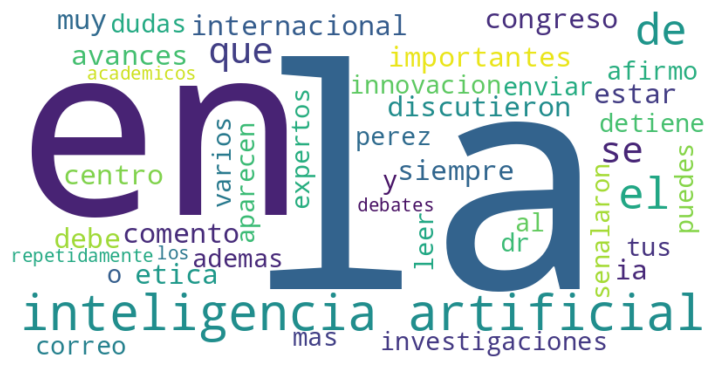

In [14]:
texto_tokens = ' '.join(tokens)
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(texto_tokens)
plt.figure(figsize=(9, 5))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

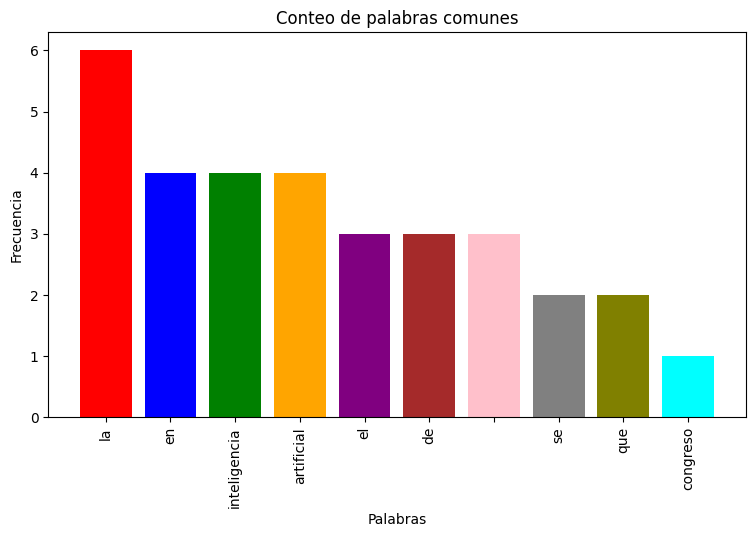

In [44]:
conteo = Counter(tokens)
comun = conteo.most_common(10)
palabras, freqs = zip(*comun)

colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
plt.figure(figsize=(9,5))
plt.bar(palabras, freqs, color=colores)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Conteo de palabras comunes')
plt.xticks(rotation=90)
plt.show()

# **Lematización con Spacy**

In [32]:
lema = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
print(lema)

['en', 'el', 'congreso', 'internacional', 'de', 'inteligencia', 'artificial', '2025', 'él', 'discutir', 'avance', 'mucho', 'importante', 'comento', 'que', 'el', 'etica', 'de', 'el', 'ia', 'deber', 'estar', 'siempre', 'en', 'el', 'centro', 'de', 'el', 'investigación', 'poder', 'leer', 'mas', 'en', 'o', 'enviar', 'tu', 'duda', 'al', 'correo', 'el', 'dr', 'perez', 'afirmo', 'el', 'innovacion', 'no', 'él', 'detener', 'adema', 'varios', 'experto', 'senalar', 'que', 'el', 'inteligencia', 'artificial', 'el', 'inteligencia', 'artificial', 'y', 'el', 'inteligencia', 'artificial', 'aparecer', 'repetidamente', 'en', 'el', 'debate', 'academico']


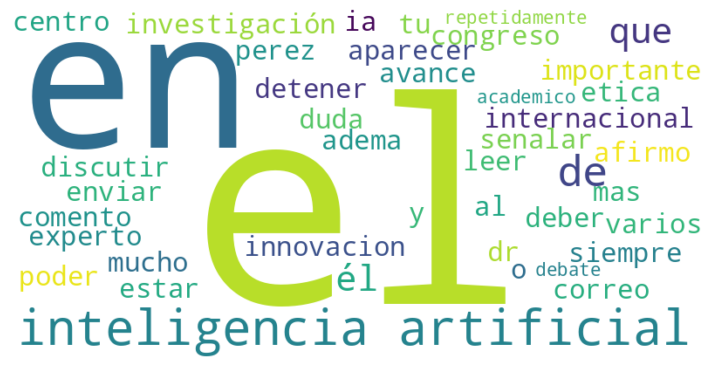

In [35]:
texto_lema = ' '.join(lema)
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(texto_lema)
plt.figure(figsize=(9, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

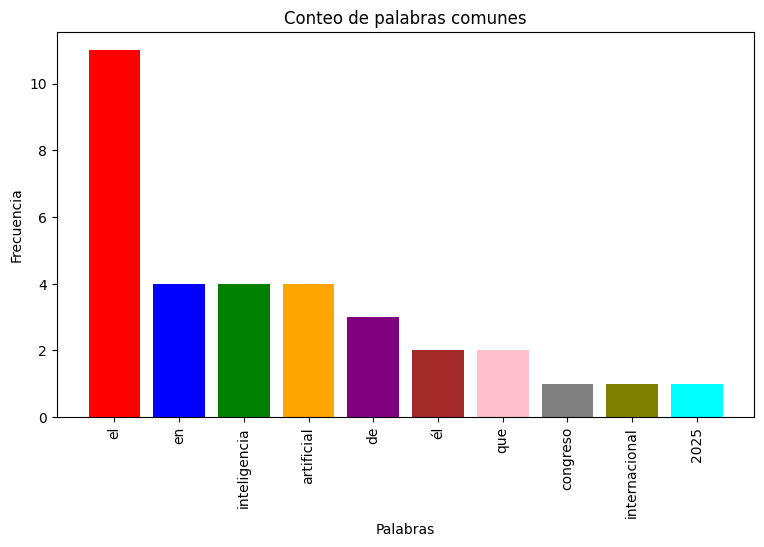

In [43]:
conteo = Counter(lema)
comun = conteo.most_common(10)
palabras, freqs = zip(*comun)

colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
plt.figure(figsize=(9,5))
plt.bar(palabras, freqs, color=colores)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Conteo de palabras comunes')
plt.xticks(rotation=90)
plt.show()

# **Stopwords con Spacy**

In [37]:
nlp = spacy.load("es_core_news_sm")
doc = nlp(texto_limpio2)
tokens_filtrados = [token.text for token in doc if not token.is_stop and token.is_alpha]
print(tokens_filtrados)

['congreso', 'internacional', 'inteligencia', 'artificial', 'discutieron', 'avances', 'importantes', 'comento', 'etica', 'ia', 'centro', 'investigaciones', 'puedes', 'leer', 'enviar', 'dudas', 'correo', 'dr', 'perez', 'afirmo', 'innovacion', 'detiene', 'expertos', 'senalaron', 'inteligencia', 'artificial', 'inteligencia', 'artificial', 'inteligencia', 'artificial', 'aparecen', 'repetidamente', 'debates', 'academicos']


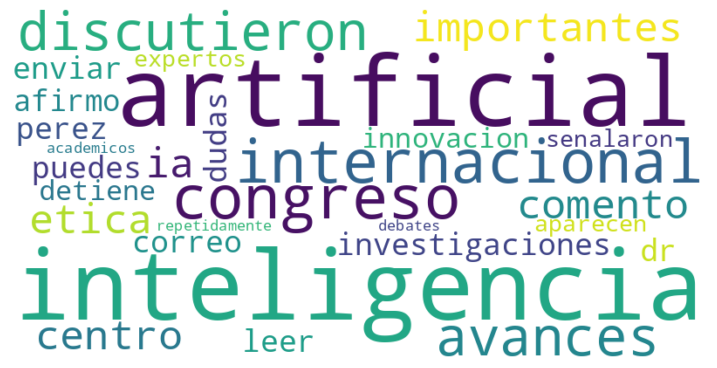

In [40]:
texto_stop = ' '.join(tokens_filtrados)
wordcloud3 = WordCloud(width=800, height=400, background_color='white').generate(texto_stop)
plt.figure(figsize=(9, 5))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

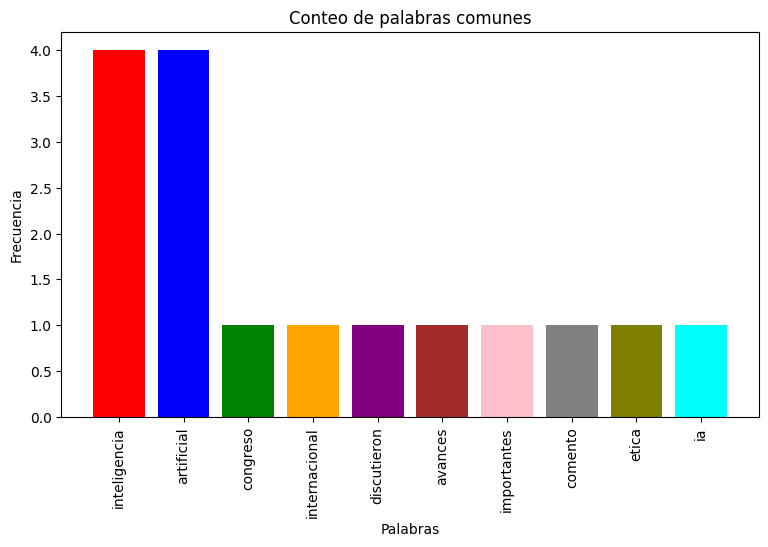

In [42]:
conteo = Counter(tokens_filtrados)
comun = conteo.most_common(10)
palabras, freqs = zip(*comun)

colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
plt.figure(figsize=(9,5))
plt.bar(palabras, freqs, color=colores)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Conteo de palabras comunes')
plt.xticks(rotation=90)
plt.show()